<a href="https://www.kaggle.com/code/kapturovalexander/kapturov-s-pima-indians-diabetes?scriptVersionId=162216526" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![](https://storage.googleapis.com/kaggle-datasets-images/228/482/a520351269b547c89afe790820a1087e/dataset-cover.jpeg)

# Pima Indians Diabetes Database

#### Predict the onset of diabetes based on diagnostic measures

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
diab = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# <span style="color: red">1 - Import the necessary libraries

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# <span style="color: red">2 - Display a list of dataset columns

In [4]:
diab.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

# <span style="color: red">3 - Check for gaps in the data

In [5]:
diab.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

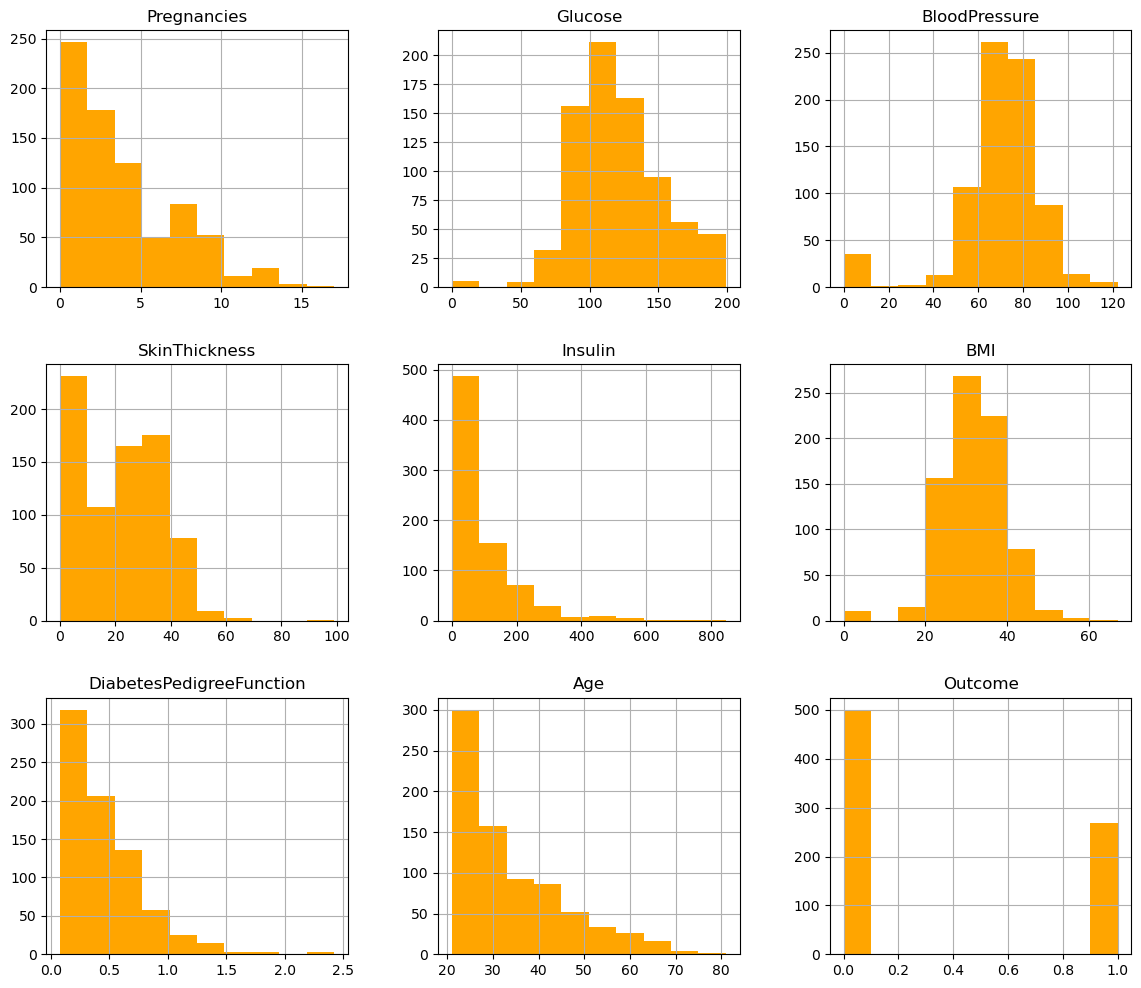

In [6]:
# Display histograms of distribution
diab.hist(figsize=(14, 12), color='orange');

# <span style="color: red">4 - Split the data into X and y

In [7]:
X = diab.drop(labels=['Outcome'], axis=1)
y = diab.Outcome

# <span style="color: red">5 - Build a heatmap of correlations

In [8]:
correlation = diab.corr()
correlation.style.background_gradient(cmap='plasma')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#### No multicollinearity observed

# <span style="color: red">6 - Look at distribution of the target variable

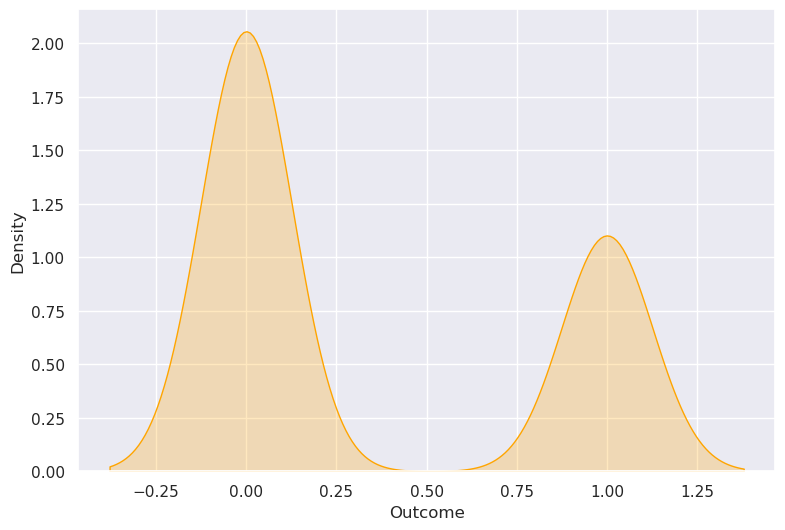

In [9]:
sns.set(rc={'figure.figsize': (9, 6)})
sns.kdeplot(y, fill=True, color='orange');

#### The distribution is clearly non-normal and bimodal

# <span style="color: red">7 - Split the data into training and test

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)

# <span style="color: red">8 - Standardize data

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

![](https://miro.medium.com/v2/resize:fit:2000/1*NBA8c2rtdUiiWG1c3FVqtw.jpeg)

# <span style="color: red">9 - Train the logistic regression model

In [12]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=10, max_iter=1000)
clf.fit(X_train_std, y_train)

LogisticRegression(max_iter=1000, random_state=10)

# <span style="color: red">10 - Get a prediction on test data

In [13]:
y_pred_train = clf.predict(X_train_std)
y_pred_test = clf.predict(X_test_std)

# get class labels
y_pred_test

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

# <span style="color: red">11 - Calculates Precision, Recall, F1 and ROC-AUC metrics

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# precision for test data
print(f'precision: {precision_score(y_test, y_pred_test):.4f}\n')

# precision for test data
print(f'recall: {recall_score(y_test, y_pred_test):.4f}\n')

# precision for test data
print(f'F1: {f1_score(y_test, y_pred_test):.4f}\n')

# precision for test data
print(f'ROC-AUC: {roc_auc_score(y_test, y_pred_test):.4f}')

precision: 0.6087

recall: 0.5185

F1: 0.5600

ROC-AUC: 0.6693


### <span style="color: red">Classification report

In [15]:
# P.S. Metrics can also be obtained in another way
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



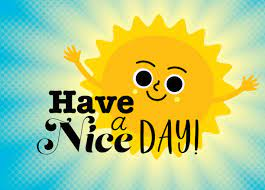